In [13]:
# To download dataset directly run following command
# !wget --no-check-certificate \
#     https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
#     -O /tmp/cats_and_dogs_filtered.zip

In [1]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
pwd

'C:\\Users\\Vivek Rai\\10-Days-ML-Challenege\\Day-5\\cats_and_dogs_filtered'

In [4]:
base_dir = 'C:\\Users\\Vivek Rai\\10-Days-ML-Challenege\\Day-5\\cats_and_dogs_filtered'

In [5]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [6]:
print(base_dir)
print(train_dir)
print(validation_dir)

C:\Users\Vivek Rai\10-Days-ML-Challenege\Day-5\cats_and_dogs_filtered
C:\Users\Vivek Rai\10-Days-ML-Challenege\Day-5\cats_and_dogs_filtered\train
C:\Users\Vivek Rai\10-Days-ML-Challenege\Day-5\cats_and_dogs_filtered\validation


In [7]:
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [8]:
print(train_cats_dir)
print(train_dogs_dir)
print(validation_cats_dir)
print(validation_dogs_dir)

C:\Users\Vivek Rai\10-Days-ML-Challenege\Day-5\cats_and_dogs_filtered\train\cats
C:\Users\Vivek Rai\10-Days-ML-Challenege\Day-5\cats_and_dogs_filtered\train\dogs
C:\Users\Vivek Rai\10-Days-ML-Challenege\Day-5\cats_and_dogs_filtered\validation\cats
C:\Users\Vivek Rai\10-Days-ML-Challenege\Day-5\cats_and_dogs_filtered\validation\dogs


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
__________________________________________

In [10]:

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/100
100/100 - 65s - loss: 0.6952 - acc: 0.5085 - val_loss: 0.6836 - val_acc: 0.5640
Epoch 2/100
100/100 - 70s - loss: 0.6875 - acc: 0.5500 - val_loss: 0.6662 - val_acc: 0.6110
Epoch 3/100
100/100 - 82s - loss: 0.6697 - acc: 0.5775 - val_loss: 0.6399 - val_acc: 0.6350
Epoch 4/100
100/100 - 115s - loss: 0.6641 - acc: 0.5840 - val_loss: 0.6854 - val_acc: 0.5180
Epoch 5/100
100/100 - 104s - loss: 0.6484 - acc: 0.6050 - val_loss: 0.6100 - val_acc: 0.6820
Epoch 6/100
100/100 - 111s - loss: 0.6459 - acc: 0.6130 - val_loss: 0.6082 - val_acc: 0.6710
Epoch 7/100
100/100 - 105s - loss: 0.6283 - acc: 0.6440 - val_loss: 0.6069 - val_acc: 0.6770
Epoch 8/100
100/100 - 113s - loss: 0.6202 - acc: 0.6505 - val_loss: 0.5854 - val_acc: 0.6940
Epoch 9/100
100/100 - 104s - loss: 0.6099 - acc: 0.6650 - val_loss: 0.5631 - val_acc: 0.7050
Epoch 10/100
100/100 - 106s - loss: 0.6069 - acc: 0.6685 - val_loss: 0.5695 - val_acc: 0.6970
Epoch 11/100
100/100 - 112s - loss: 0.5894 - acc: 0.6885 - val_loss: 0.5

Epoch 89/100
100/100 - 55s - loss: 0.4177 - acc: 0.8065 - val_loss: 0.4068 - val_acc: 0.8090
Epoch 90/100
100/100 - 78s - loss: 0.4037 - acc: 0.8195 - val_loss: 0.4346 - val_acc: 0.8030
Epoch 91/100
100/100 - 76s - loss: 0.4069 - acc: 0.8140 - val_loss: 0.4262 - val_acc: 0.8190
Epoch 92/100
100/100 - 113s - loss: 0.3979 - acc: 0.8300 - val_loss: 0.4005 - val_acc: 0.8160
Epoch 93/100
100/100 - 115s - loss: 0.4045 - acc: 0.8245 - val_loss: 0.4212 - val_acc: 0.7970
Epoch 94/100
100/100 - 108s - loss: 0.4119 - acc: 0.8090 - val_loss: 0.3902 - val_acc: 0.8240
Epoch 95/100
100/100 - 112s - loss: 0.4048 - acc: 0.8065 - val_loss: 0.3828 - val_acc: 0.8270
Epoch 96/100
100/100 - 104s - loss: 0.3958 - acc: 0.8205 - val_loss: 0.4383 - val_acc: 0.7920
Epoch 97/100
100/100 - 113s - loss: 0.3906 - acc: 0.8155 - val_loss: 0.4456 - val_acc: 0.8070
Epoch 98/100
100/100 - 105s - loss: 0.3974 - acc: 0.8260 - val_loss: 0.4057 - val_acc: 0.8180
Epoch 99/100
100/100 - 113s - loss: 0.4054 - acc: 0.8175 - val_

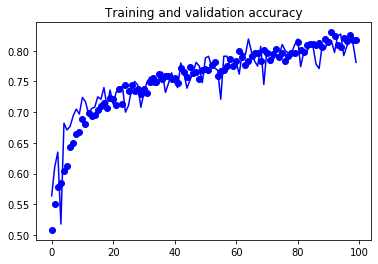

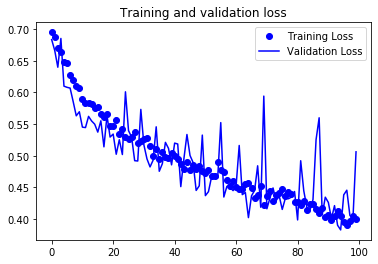

In [12]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('graph.jpg')
plt.show()